<a href="https://colab.research.google.com/github/Gh6if84vi/ML2024/blob/main/7Copy_of_AIML_III_Module_02_Lab_01_Basic_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Better data visulaizations lead to the better covey of message.So its wise to say that **Data is only as good as it is presented**.

In this lab, you will learn simple ways to visualize your data using commonly-used libraries. Understanding the plots would further help in decoding the various features in the dataset and their impact on the target variables.

Data visualizations in Python can be done via many packages. We’ll be discussing first the *matplotlib* package which can be used in Python scripts, Jupyter notebook, and web application servers.

### **Matplotlib**

It is a 2-D plotting library that helps in visualizing figures. Matplotlib emulates Matlab like graphs and visualizations. Matlab is not free, is difficult to scale and as a programming language is tedious. So, matplotlib in Python is used as it is a robust, free and easy library for data visualization.

In [2]:
import requests
# requests is a popular Python library for making HTTP requests
url="https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response=requests.get(url)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [4]:
#loading the dataset
data=StringIO(response.text)
data=pd.read_csv(data)
print("Number of data points=",len(data))
# For getting first ten rows of datasets
data.head(10)
# For getting last three rows of dataset
data.tail(3)

Number of data points= 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
#Removing rows which has missing values-basically cleaning the data
data.replace("?",np.nan,inplace=True)
data=data.dropna()
print(len(data))

159


In [8]:
# Dividing the dataset into features(X) and target variable(y)
X=data.drop("price",axis=1)
y=pd.to_numeric(data["price"])

To begin with let's see the plot for Car making company on the X-axis and the price of the car on the Y-axis.

To do this, we use matplotlib.pyplot's scatter() function to create a Scatter Plot for the same.
As far as Machine learning/Data Science is concerned, one of the most commonly used plot for simple data visualization is scatter plots. This plot gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features (columns). Scatter plots are available in 2-D as well as 3D . The 2-D scatter plot is the important/common one, where we will primarily find patterns/clusters and separability of the data. The code snippet for using a scatter plot is as shown below.

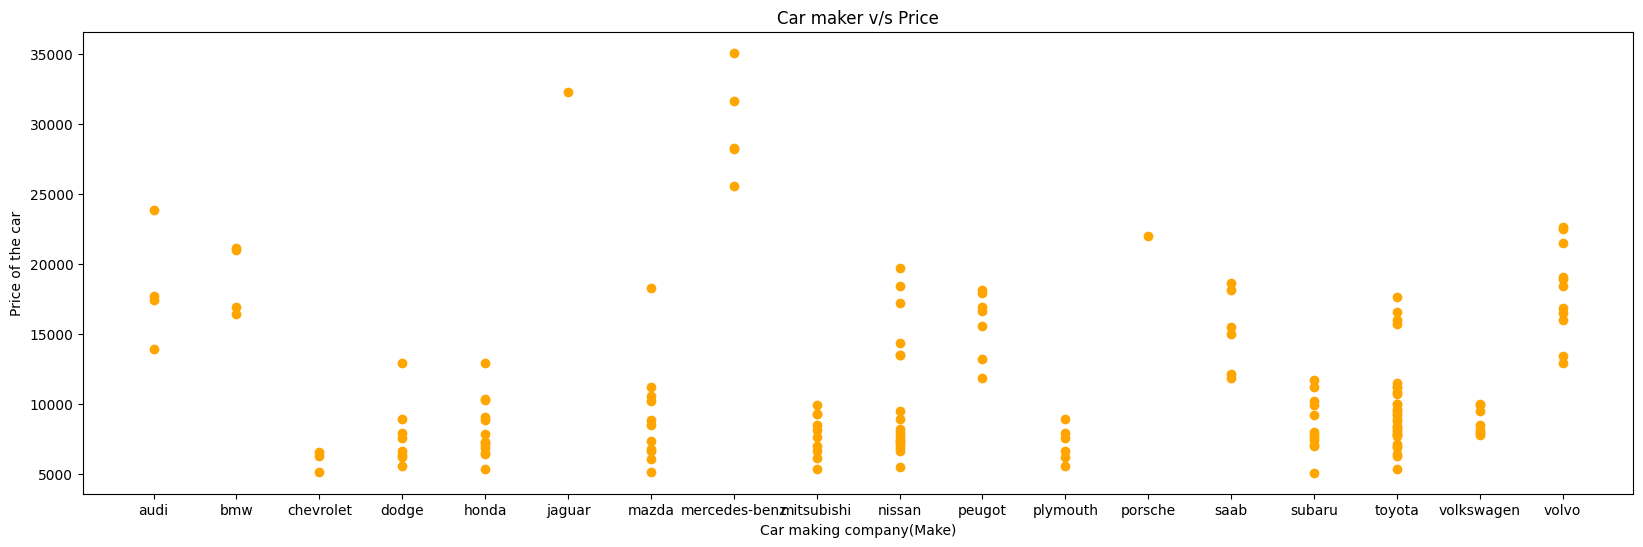

In [13]:
plt.figure(figsize=(20,6))
plt.scatter(X["make"],y,color="orange")
plt.xlabel("Car making company(Make)")
plt.ylabel("Price of the car")
plt.title("Car maker v/s Price")
plt.show()

Even though the scatter plot clearly shows that some car makers like Mercedes-benz, Jaguar, Porsche and BMW keep their cars on the higher side of the price range. But is there a better way to understand the distribution of cars within these companies as well?

To do this, we will use the Seaborn package. Seaborn is a Python data visualization library based on matplotlib.

We will be creating a Box Plot. This is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles. From a box plot we can also see the Interquartile range(IQR) where maximum details of the data will be present. It also gives us a clear overview of outlier points in the data
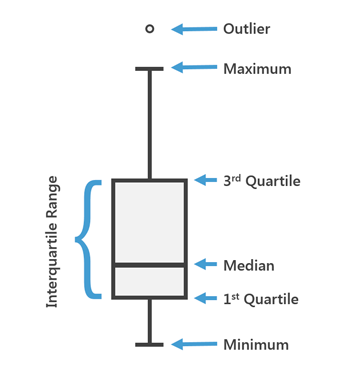

<ipython-input-14-86422445b96f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=y,palette="Set3").set_title("Car manufacturer v/s Price")


Text(0.5, 1.0, 'Car manufacturer v/s Price')

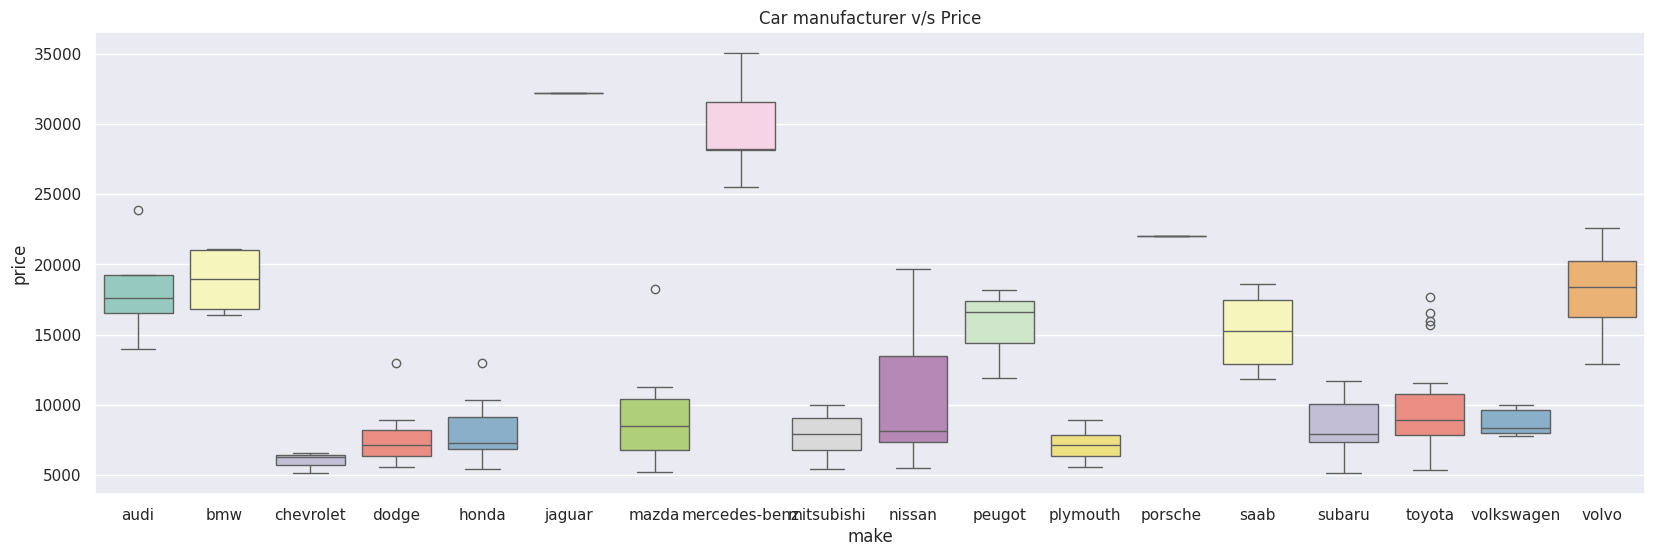

In [14]:
import seaborn as sns
sns.set(rc={"figure.figsize":(20,6)})
sns.boxplot(x=X["make"],y=y,palette="Set3").set_title("Car manufacturer v/s Price")

It becomes evidently clear that Mercedes-Benz, Jaguar and Porsche have the costliest cars. BMW too has costly cars but the large interquartile range suggests that the company has a broader range of cars in the market. The outliers are also important as for example, Mazda has a car listed much higher than its normal price range.

All of these conclusions could be very hard to get to using the data in a tabular format, whereas it became evidently clear straight away once we used Visualization techniques to understand the dataset.

You can also use a Violin Plot to understand the distribution within each car maker in a better way. These violin plots can be inferred as a combination of Box plot at the middle and distribution plots (Kernel Density Estimation) on both side of the data. This can give us the details of distribution like whether the distribution is mutimodal, its skewness etc. It also give us useful information like the 95% confidence interval. The below image can help us grasp some important parts from a violin plot.

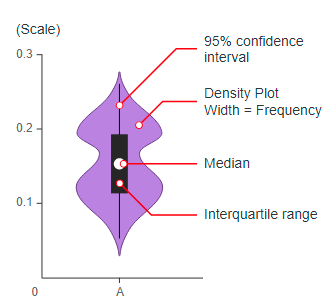

<ipython-input-15-5d6f98323a29>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=X["make"],y=y,palette="Set3").set_title("Car marker v/s Price-vilin plot")


Text(0.5, 1.0, 'Car marker v/s Price-vilin plot')

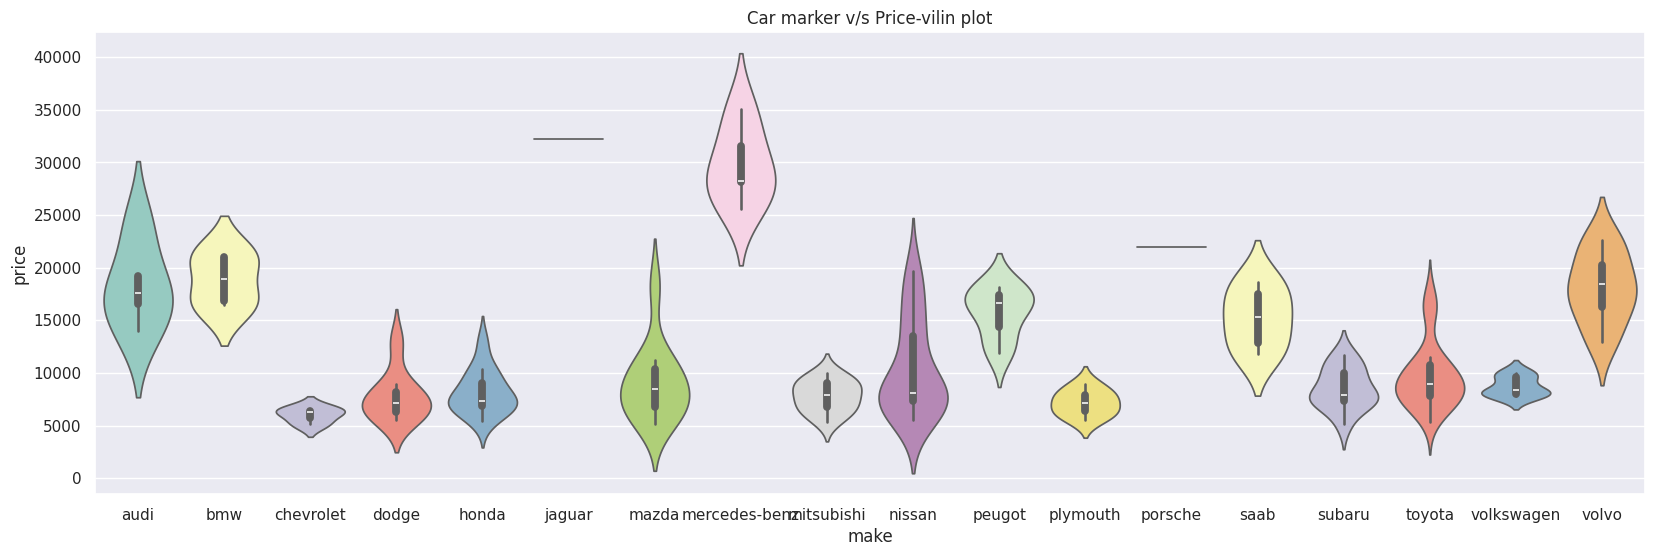

In [15]:
sns.violinplot(x=X["make"],y=y,palette="Set3").set_title("Car marker v/s Price-vilin plot")

Another plot type are the Swarm Plots. They offer an alternate way of plotting the distribution of an attribute or the joint distribution of a couple of attributes. Unlike strip plots, swarm plots attempt to avoid obscuring points by calculating non-overlapping positions instead of adding random jitter. This sort of gives them appearance of a swarm of bees, or perhaps a honeycomb.

Text(0.5, 1.0, 'Car manufactureer v/s Price-swarm plot')

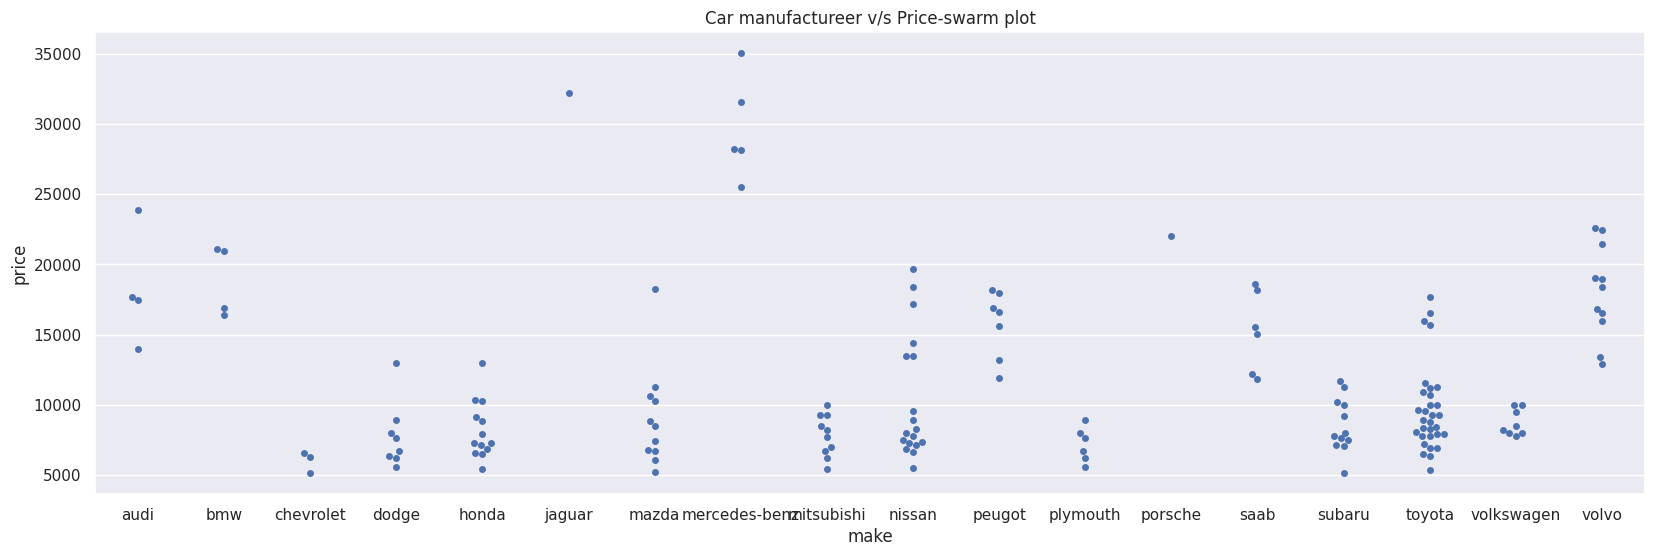

In [16]:
sns.swarmplot(x=X["make"],y=y).set_title("Car manufactureer v/s Price-swarm plot")

Now let us try to learn a bit more about the various features in our dataset. One of the features is Horsepower, used to describe the power that an engine is capable of producing. A sensible assumption could be that Sport car companies like Porsche would have more cars with higher horsepowers. Lets check if this is actually true ...

<ipython-input-17-af2f218fa252>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]),palette="Set3").set_title("car maker v/s HorsePower-Box plot")


Text(0.5, 1.0, 'car maker v/s HorsePower-Box plot')

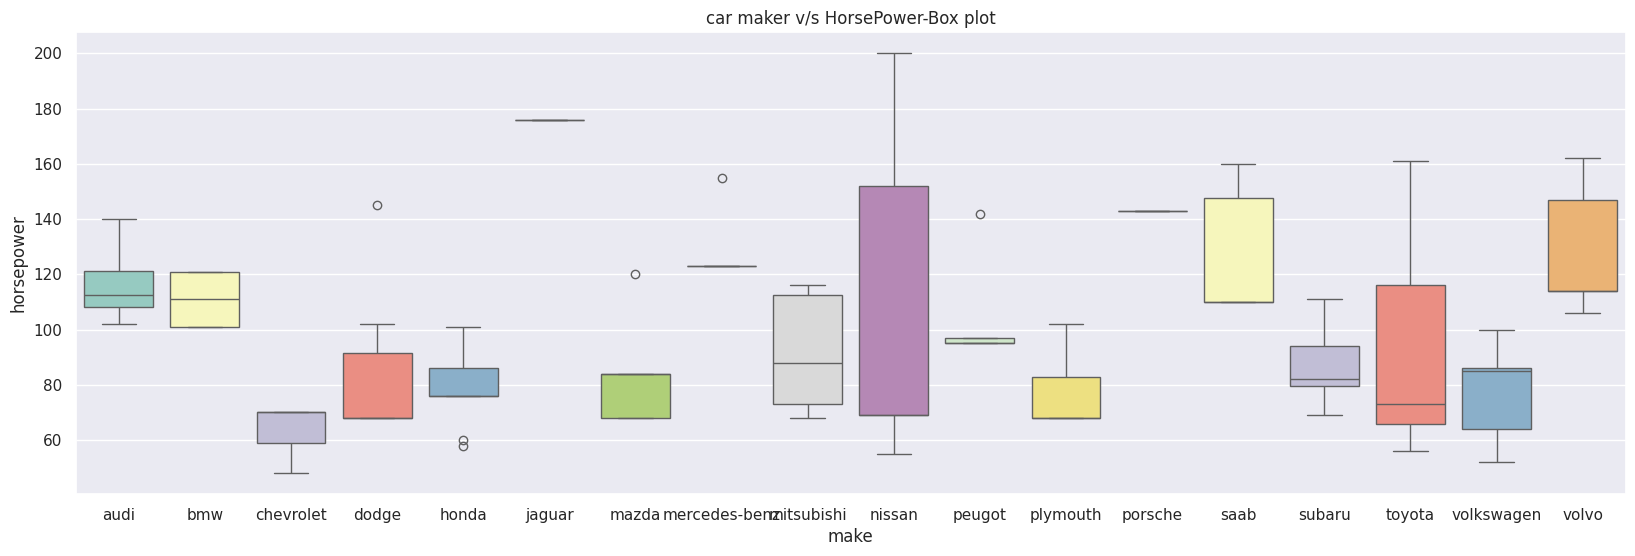

In [17]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]),palette="Set3").set_title("car maker v/s HorsePower-Box plot")

As expected carmakers like Jaguar and Porsche have most of their cars with very high HP. A reasonable next step would be to see, if this new interesting feature has some correlation with our target variable "price".
Also nissan has cars with broader range of horse powers
A simple way to check this is to again plot a scatterplot (but this time lets do this using Seaborn instead of Matplotlib).

An expected positive correlation should show up with most of the points lying around a line with a positive slope


<Axes: xlabel='horsepower', ylabel='price'>

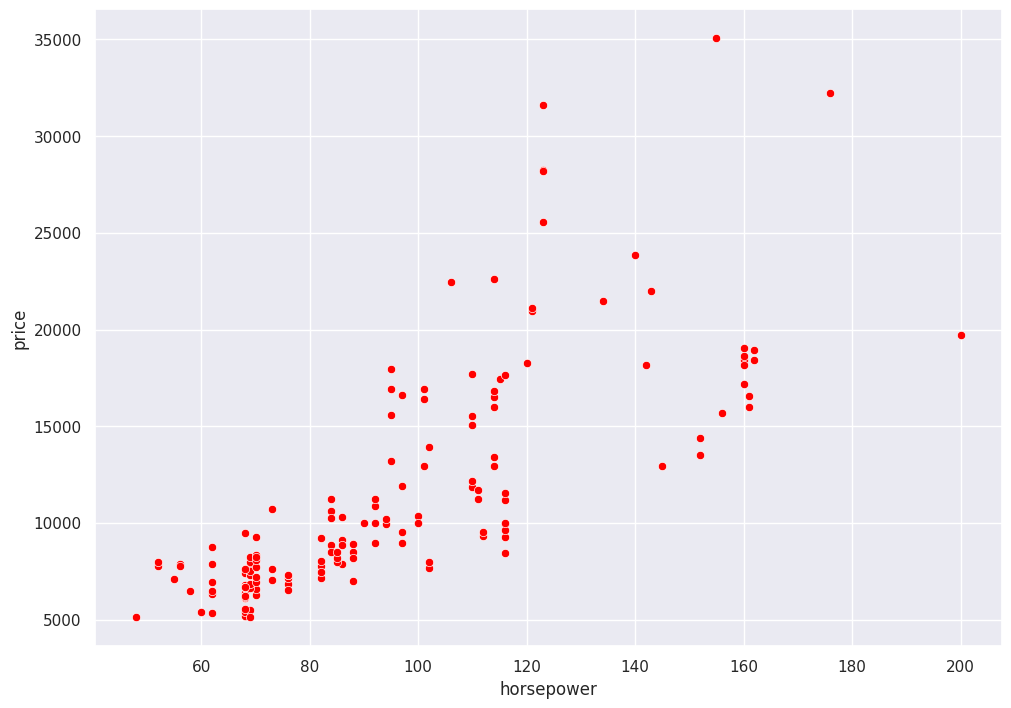

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]),y=y,color="red")

**A quick obseravtiion is more the horsepower,more the price of a car**

A better way of plotting these correlations is using a Jointplot instead of a simple scatter plot. The jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

I have also used the parameter "reg" which fits a regression line through the points making the correlation sign apparent. A line with positive slope would indicate a postiive correlation and vice versa. A line parallel to x-axis would indicate no correlation between the 2 variables (implying independence

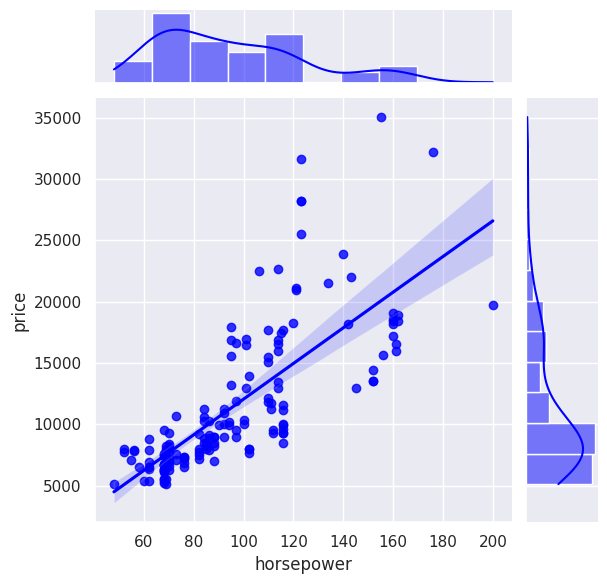

In [22]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]),y=y,kind="reg",color="blue")

**The answer for  Plot the jointplot for a feature which has negative correlation with the target variable "price" **

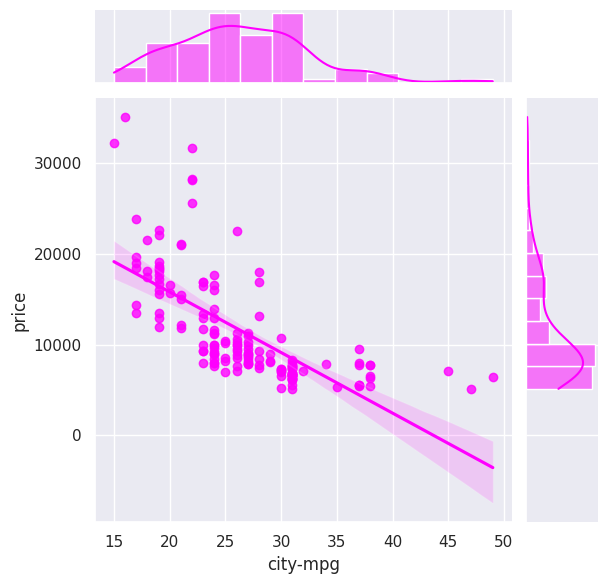

In [23]:
feature="city-mpg"
sns.jointplot(x=pd.to_numeric(X[feature]),y=y,kind="reg",color="magenta")

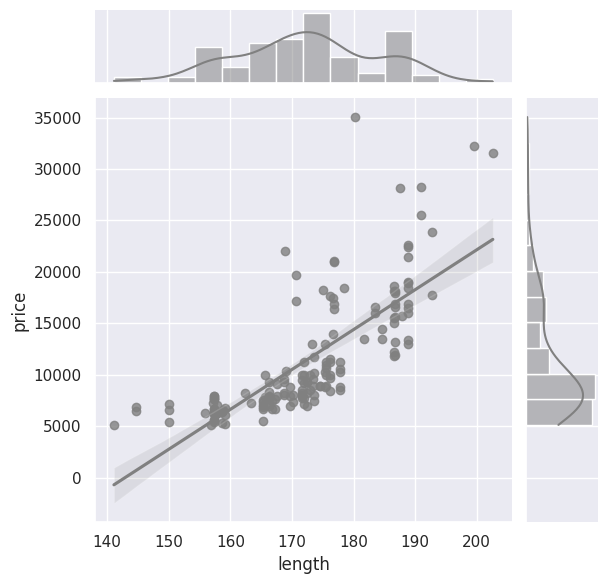

In [24]:
feature="length"
# oops a positive coorealtion
sns.jointplot(x=pd.to_numeric(X[feature]),y=y,kind="reg",color="gray")

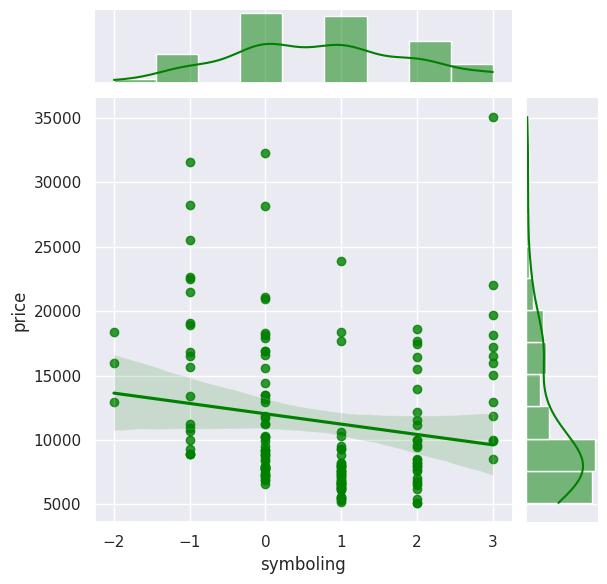

In [25]:
feature="symboling"
sns.jointplot(x=pd.to_numeric(X[feature]),y=y,kind="reg",color="green")
# symboling and price are negatively coorelated

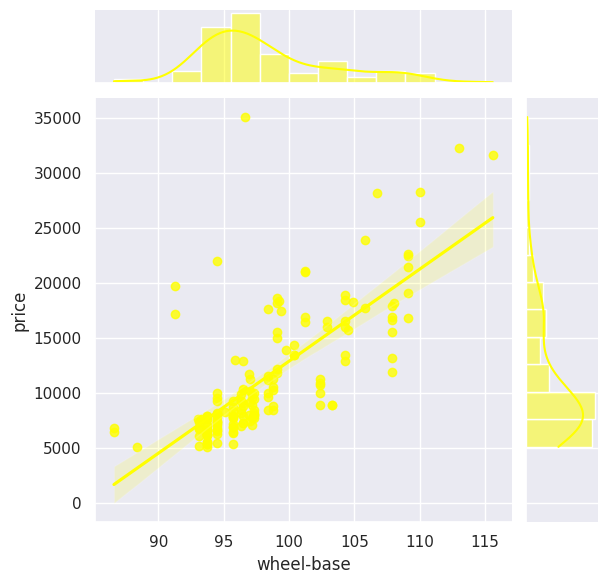

In [26]:
feature="wheel-base"
sns.jointplot(x=pd.to_numeric(X[feature]),y=y,kind="reg",color="yellow")

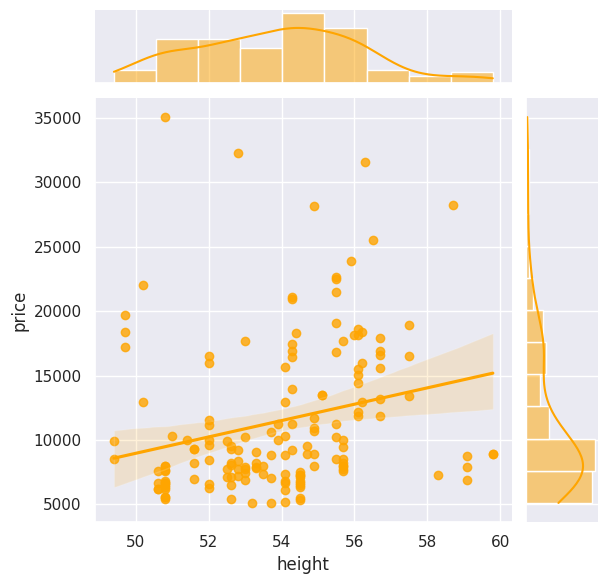

In [27]:
feature="height"
sns.jointplot(x=pd.to_numeric(X[feature]),y=y,kind="reg",color="orange")
#

**Question: Interpret the plot below. List all the interpretations point by point using the plot below.**
Some pointers:

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

3) Do you think the body-style of a car can be a good predictor for its price?

<ipython-input-28-ed9f901425a5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["body-style"],y=y,palette="Set3").set_title("body-style v/s Price-Box plot")


Text(0.5, 1.0, 'body-style v/s Price-Box plot')

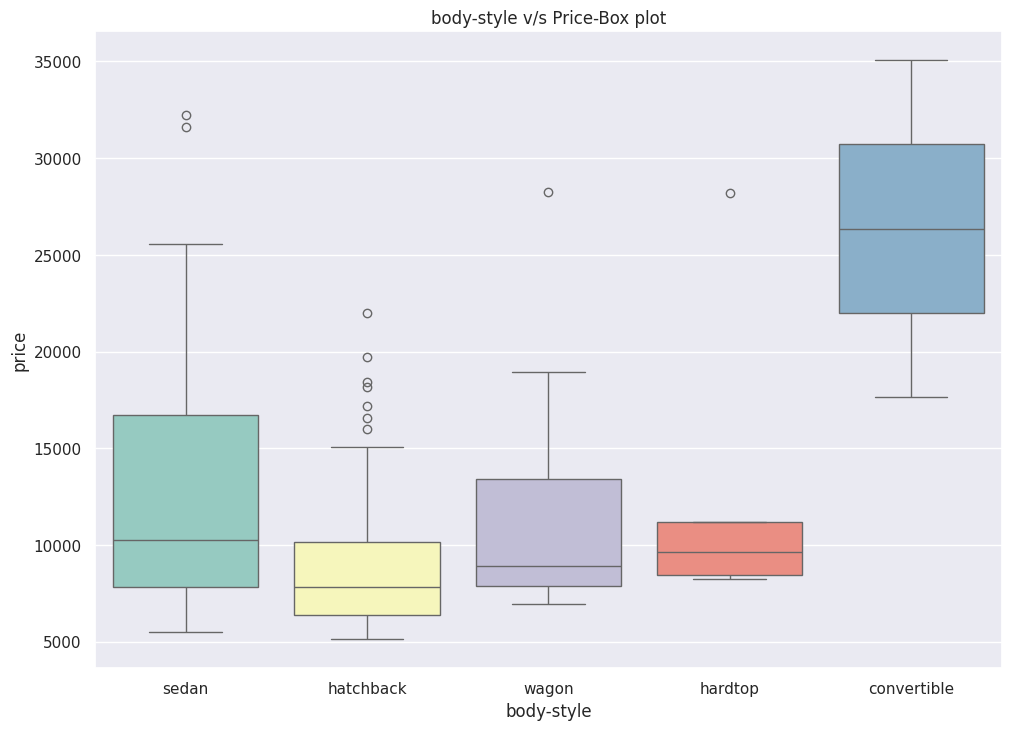

In [28]:
# lets plot :)
sns.boxplot(x=X["body-style"],y=y,palette="Set3").set_title("body-style v/s Price-Box plot")

**Answers are........**


1)Think about the maximum/minimum values for each body-type, which body-type is the "costliest"
           ------->*As observed,convertible is the costliest body type*

2)Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

          -------->*we can assert our conclusion based on which body type is costliest by taking inter quartile range,because it adds further volume to our observation *

3) Do you think the body-style of a car can be a good predictor for its price?

           ---------->*See,body-style is one of the way for predicting car price,but we can also choose horse power,length,width,sometimes engine size for predicting the price of a car*
            

**Exercise**


1)Plotting multiple plots together: Search for information about plt.subplots(). Choose any 2 plot types from the ones discussed above and plot them together in a single figure using subplots


<ipython-input-29-0f28304ff4af>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]),palette="Set3",ax=axis[1])


Text(0.5, 1.0, 'Box plot')

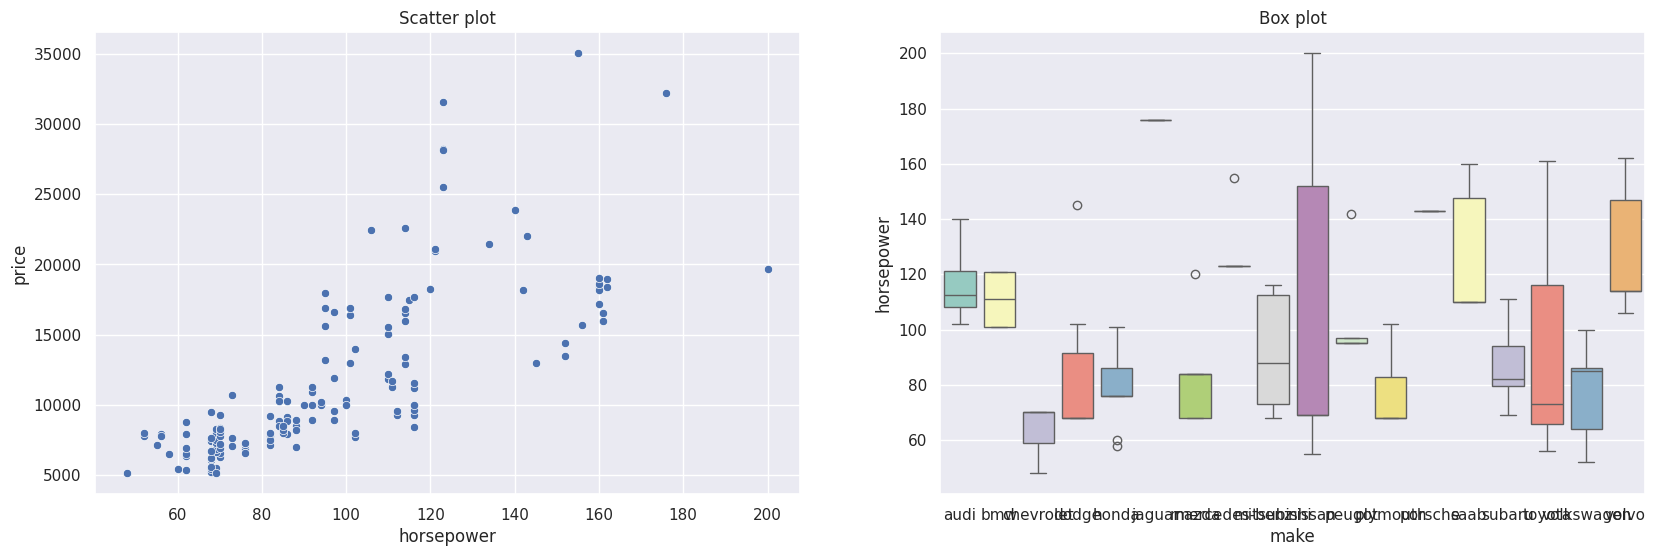

In [29]:
fig,axis=plt.subplots(1,2,figsize=(20,6))
#scatter plot
sns.scatterplot(x=pd.to_numeric(X["horsepower"]),y=y,ax=axis[0])
axis[0].set_title("Scatter plot")
#box plot
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]),palette="Set3",ax=axis[1])
axis[1].set_title("Box plot")

2)Go through the Seaborn documentation and find a plot type that has not been demonstrated in the examples above. Use this new plot type to represent the above data in a meaningful way.

<Axes: xlabel='height', ylabel='price'>

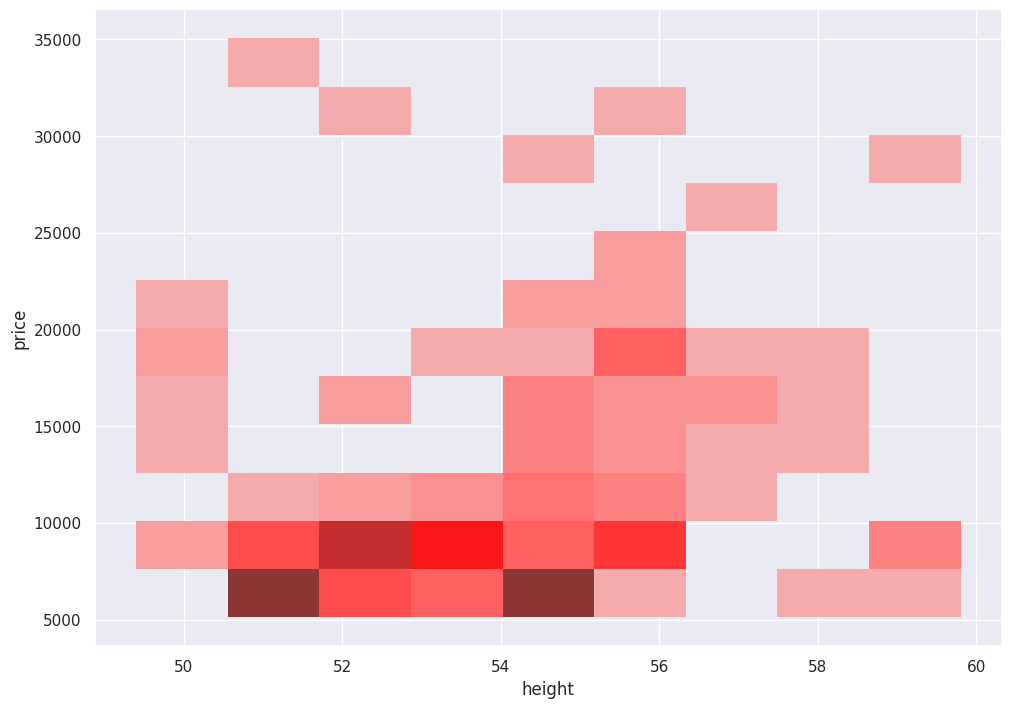

In [33]:
#plotting a histogram
sns.histplot(x=pd.to_numeric(X["height"]),y=y,color="red")